官方分析: https://insights.stackoverflow.com/survey/2020

数据来源: https://insights.stackoverflow.com/survey


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) #解除pandas自动压缩显示列数
pd.set_option('display.max_rows', None) #解除pandas自动压缩显示行数
pd.set_option('max_colwidth', 1000) #扩大单列宽度限制,方便查看

In [2]:
survey = pd.read_csv('./data/survey_results_public.csv') #载入路径为相对路径

# 数据预览

预览数据的"形状"(在info中也可以看到)

In [3]:
survey.shape

(64461, 61)

In [4]:
print("该数据有{rownum}条,即{rownum}行.共有{colnum}个特征(即{colnum}列)".format(rownum = survey.shape[0], colnum = survey.shape[1]))

该数据有64461条,即64461行.共有61个特征(即61列)


查看前几行的数据(默认查看前五行)

In [5]:
survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-employed",White or of European descent,Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work with,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other physical activity;Do other work and come back later,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics);Stack Overflow Jobs (for job seekers),Visit Stack Overflow;Go for a walk or other physical activity,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional developmen

info中包含的信息有: 

1. 数据的"形状"(RangeIndex和Datacolumns)
2. 每一个特征中非空元素的数量(可以借此查看空元素个数,如果有数据清理需要,可以通过给空值填充数据或删除空值所在的行进行处理)
3. 每一列的numpy数据类型

In [6]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

Describe中包括统计变量.默认只统计Numerical Value(除非只有Categorical Value).需要加include = 'all'

In [7]:
survey.describe(include = 'all')

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
count,64461.000000,64162,64416,45446.000000,57900,40069,3.482600e+04,3.475600e+04,64072,45472,45472,44070,49537,49370,57431,63854,45948,50557,49349,45194,51727,54113,57378,42379,40314,47287,52883,42686,41732,48465,42286,41022,56156,50804,42623,57205,43231,37321,54803,58275,54983,56228,44334,50605,53843,39364,43992,56805,56476,46792,56970,51802,51701,49345,50995,40024,42279,52683,41151.000000,57684,46349
unique,NaN,5,2,NaN,63,3,NaN,NaN,183,142,141,3193,2808,8269,9,7,208,7,230,5,3,16243,14256,5216,2730,1277,1153,3,5,5,2172,63,4,3,3,2,5,63,4,61,444,4,9,7471,6287,3,14,3,6,6,6,3,3,2,12,3986,3789,6,NaN,52,52
top,NaN,I am a developer by profession,Yes,NaN,15,Yearly,NaN,NaN,United States,United States dollar,USD,PostgreSQL,MySQL,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options",Very satisfied,"I’m not actively looking, but I am open to new opportunities",Python,HTML/CSS;JavaScript;PHP;SQL,Node.js,Node.js,Github,Github,Yes,Extremely important,Fairly important,Curious about other opportunities;Better compensation;Wanting to work with new technologies;Growth or leadership opportunities,"Read company media, such as employee blogs or company culture videos;Company reviews from third party sites (e.g. Glassdoor, Blind);Publicly available financial information (e.g. Crunchbase);Personal network - friends or family;Read other media like news articles, founder profiles, etc. about the company;Directly asking current or past employees at the company",Every few months,Not sure,Yes,No,Sometimes: 1-2 days per month but less than weekly,Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow,"Hello, old friend",Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics),Visit Stack Overflow,Windows,20 to 99 employees,Linux,Windows,I have little or no influence,Straight / Heterosexual,Yes,"Yes, somewhat",Less than once per month or monthly,Daily or almost daily,Easy,Appropriate in length,No,"Computer science, computer engineering, or software engineering",React.js,jQuery,Just as welcome now as I felt last year,NaN,10,3
freq,NaN,47193,50388,NaN,5618,19818,NaN,NaN,12469,11050,11050,2310,3827,4424,26542,45270,29318,46013,2777,14611,29776,1152,1073,4134,7151,4732,4343,18712,20093,12674,1127,2456,20938,20213,20729,33367,11547,7349,28262,22415,2904,27170,9597,2011,4770,16987,40118,47275,15273,20432,17372,34626,38769,48871,31582,2480,2079,37201,NaN,4510,4815
mean,32554.079738,NaN,NaN,30.834111,NaN,NaN,3.190464e+242,1.037561e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.782174,NaN,NaN
std,18967.442360,NaN,NaN,9.585392,NaN,NaN,inf,2.268853e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17

由于我们的目的只是做大致的用户画像,所以需要删除与部分与用户画像无关的内容与对调查问卷本身满意度的反馈,这需要参考`survey_result_schema.csv`和`so_survey_2020.pdf`作为背景资料

这里我们将`survey_result_schema.csv`显示在notebook内以便查看

In [8]:
information = pd.read_csv('./data/survey_results_schema.csv')
information

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
8,Country,Where do you live?
9,CurrencyDesc,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."


使用其中部分特征进行分析(没有被选入的部分也同样具有参考价值,这里只是作为一个pandas选取部分特征的应用例子)

1. MainBranch

1. Hobbyist

1. Age

1. Age1stCode

1. CompFreq

1. ConvertedComp

1. Country

1. DevType

1. EdLevel

1. Employment

1. Ethnicity

1. Gender

1. JobFactors

1. JobSat

1. JobSeek

1. LanguageWorkedWith

1. LanguageDesireNextYear

1. NEWEdImpt

1. NEWLearn

1. OpSys

1. OrgSize

1. Sexuality

1. UndergradMajor

1. WorkWeekHrs

1. YearsCode

1. YearsCodePro

In [9]:
wanted_cols = ['MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'ConvertedComp', 'Country', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageWorkedWith', 'NEWEdImpt', 'NEWLearn', 'OpSys', 'OrgSize', 'Sexuality', 'UndergradMajor', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro', 'LanguageDesireNextYear']

# 这样就截取出了我们需要的列
to_analyze = survey[wanted_cols]

In [10]:
to_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              64162 non-null  object 
 1   Hobbyist                64416 non-null  object 
 2   Age                     45446 non-null  float64
 3   Age1stCode              57900 non-null  object 
 4   CompFreq                40069 non-null  object 
 5   ConvertedComp           34756 non-null  float64
 6   Country                 64072 non-null  object 
 7   DevType                 49370 non-null  object 
 8   EdLevel                 57431 non-null  object 
 9   Employment              63854 non-null  object 
 10  Ethnicity               45948 non-null  object 
 11  Gender                  50557 non-null  object 
 12  JobFactors              49349 non-null  object 
 13  JobSat                  45194 non-null  object 
 14  JobSeek                 51727 non-null

我们可以看出其中部分列的数据类型是int或float,而另外一部分列的数据类型是object

前者为连续数值型变量(Numerical Value), 后者为离散型变量(Categorical Value)

我们将Numerical Value拿出来以便后续可视化

In [11]:
num_vals = []
cat_vals = []
for col in to_analyze:
    if to_analyze[col].dtype != 'object':
        num_vals.append(col)
    else:
        cat_vals.append(col)

print(cat_vals)
print(num_vals)

['MainBranch', 'Hobbyist', 'Age1stCode', 'CompFreq', 'Country', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageWorkedWith', 'NEWEdImpt', 'NEWLearn', 'OpSys', 'OrgSize', 'Sexuality', 'UndergradMajor', 'YearsCode', 'YearsCodePro', 'LanguageDesireNextYear']
['Age', 'ConvertedComp', 'WorkWeekHrs']


比较奇怪的是, 部分项例如Age1stCode看起来像是数值型变量,但是显示为object.让我们看看是什么导致了这个结果

In [12]:
to_analyze['Age1stCode'].value_counts()

15                      5618
14                      5514
16                      5463
18                      5382
12                      5081
13                      4187
17                      3973
10                      3424
19                      3120
20                      2453
11                      2358
8                       1624
9                       1231
21                      1221
22                       999
7                        978
23                       710
25                       636
24                       577
6                        566
Younger than 5 years     414
5                        368
26                       342
27                       264
28                       246
30                       235
29                       170
32                       107
31                        89
35                        86
33                        82
34                        49
40                        39
37                        33
38            

可以看出罪魁祸首是 Younger than 5 years 和 Older than 85.在这里我们考虑将一些具体年龄转化为年龄段.更加方便使用Categorical Value适用的可视化方法

In [13]:
def seperate_age(age):
    try:
        age = int(age)
        if age <= 10:
            return '5 - 10'
        elif age <= 20:
            return '11 - 20'
        elif age <= 30:
            return '21 - 30'
        elif age <= 45:
            return '31 - 45'
        elif age <= 60:
            return '46 - 60'
        else:
            return '> 60'
    except:
        if age == 'Older than 85':
            return '> 60'
        else:
            return '< 5'

将转化后的特征计入到to_analyze,丢弃转换前的特征

warming可以不用管,只是提示你这个操作比较危险,可以使用以下代码关闭该提示:
```
import warnings
warnings.filterwarnings('ignore')
```

In [14]:
to_analyze['AgeRg1stCode'] = to_analyze['Age1stCode'].apply(lambda x: seperate_age(x))
to_analyze.drop('Age1stCode', axis = 1, inplace = True)
cat_vals.append('AgeRg1stCode')
cat_vals.remove('Age1stCode')

<ipython-input-14-05a2bacfafb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_analyze['AgeRg1stCode'] = to_analyze['Age1stCode'].apply(lambda x: seperate_age(x))
C:\Users\Admin\.conda\envs\analyze\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# 分析与可视化

查看一共有多少种常用语言

In [15]:
languages = set()
def add_language(cell):
    if isinstance(cell, str): #如果数据类型是字符串
        langs = cell.split(';')
        for lan in langs:
            languages.add(lan)
            
to_analyze['LanguageDesireNextYear'].map(add_language)
print(languages)

{'Kotlin', 'Scala', 'Haskell', 'Julia', 'C++', 'Assembly', 'VBA', 'Objective-C', 'Python', 'TypeScript', 'Swift', 'Dart', 'Bash/Shell/PowerShell', 'Java', 'JavaScript', 'PHP', 'C#', 'C', 'Ruby', 'Go', 'HTML/CSS', 'Rust', 'SQL', 'Perl', 'R'}


假设你任职于一所教育机构,机构原本主要培训C++,Java等大型工程常用语言.公司有开展Python培训的意愿,需要你基于上述Stackoverflow的数据,对Python适用人群进行一定分析

In [16]:
#将其中Python用户筛选出来
python_user = to_analyze[to_analyze['LanguageDesireNextYear'].str.contains('Python', na = False)]

msg = "总调查用户数为{all_data},其中希望在明年继续使用或即将使用Python的用户数为{pyuser},占总用户数的{percentage}%".format(all_data = to_analyze.shape[0], pyuser = python_user.shape[0], percentage = round(python_user.shape[0]/to_analyze.shape[0] * 100, 2))

print(msg)

# 筛选出Python用户后这一列在分析潜在Python用户中就没用了,可以丢弃
python_user = python_user.drop('LanguageDesireNextYear', axis = 1)

总调查用户数为64461,其中希望在明年继续使用或即将使用Python的用户数为26682,占总用户数的41.39%


In [17]:
#同样分离出出C++用户作为示例
cpp_user = to_analyze[to_analyze['LanguageDesireNextYear'].str.contains('C++', regex=False, na = False)] #pandas里默认的字符串查找类似SQL,采用正则表达式. '+'是特殊字符,所以需要关闭正则选项(设置regex = False)或把C++改成C\+\+(加入转义字符)
cpp_user = cpp_user.drop('LanguageDesireNextYear', axis = 1)

msg = "总调查用户数为{all_data},其中希望在明年继续使用或即将使用C++的用户数为{cppuser},占总用户数的{percentage}%".format(all_data = to_analyze.shape[0], cppuser = cpp_user.shape[0], percentage = round(cpp_user.shape[0]/to_analyze.shape[0] * 100, 2))

print(msg)

总调查用户数为64461,其中希望在明年继续使用或即将使用C++的用户数为9756,占总用户数的15.13%


In [18]:
both_use = to_analyze[(to_analyze['LanguageDesireNextYear'].str.contains('C++', regex=False, na = False)) & (to_analyze['LanguageDesireNextYear'].str.contains('Python', na = False))]

print("明年将同时使用C++和Python的人数为" + str(len(both_use)))

明年将同时使用C++和Python的人数为6125


In [19]:
not_use_anymore = to_analyze[(~to_analyze['LanguageDesireNextYear'].str.contains('C++', regex=False, na = False)) & (to_analyze['LanguageDesireNextYear'].str.contains('Python', na = False)) & (to_analyze['LanguageWorkedWith'].str.contains('C++', regex=False, na = False))]

print("准备弃用C++,改用Python的人数为" + str(len(not_use_anymore)))

准备弃用C++,改用Python的人数为3446


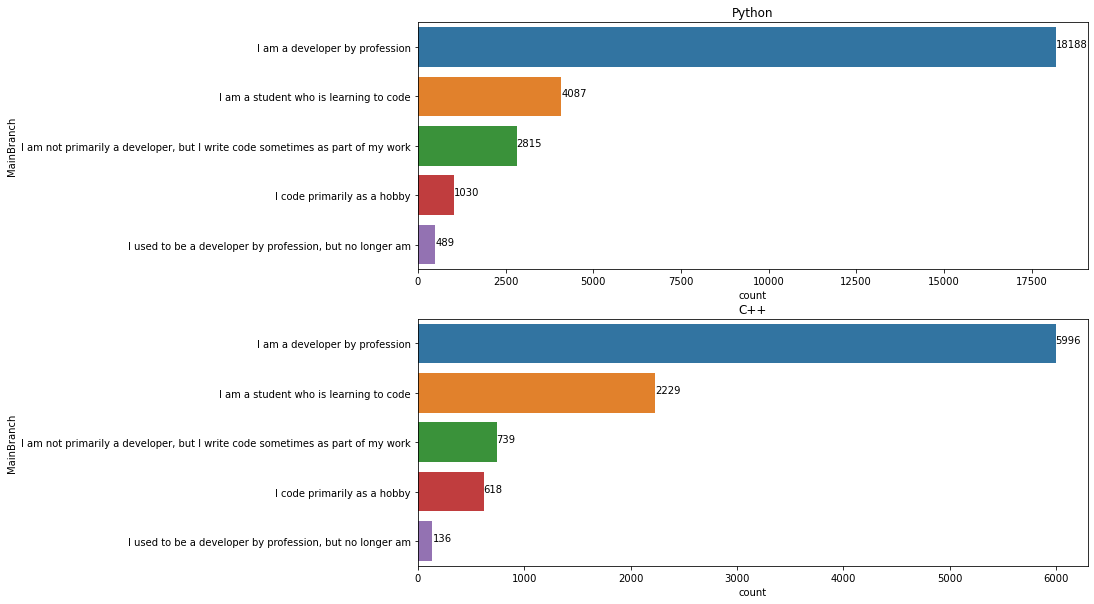

In [20]:
figure, axes = plt.subplots(2, 1, figsize = (12, 10))
index = 0
lang_ls = ['Python', 'C++']
for data in [python_user, cpp_user]:
    sns.countplot(ax = axes[index], y='MainBranch', data=data, order=sorted(data['MainBranch'].value_counts().keys().tolist())) #思考:不加order会出现什么情况?
    for p in axes[index].patches:
        axes[index].text(s = p.get_width(), x = p.get_width(), y = (p.get_y()+p.get_height()/2))
    axes[index].title.set_text(lang_ls[index])
    index += 1
plt.show()

思考:从上面的柱状图中能联想到什么?

seaborn中没有饼图,使用原生matplotlib进行绘制

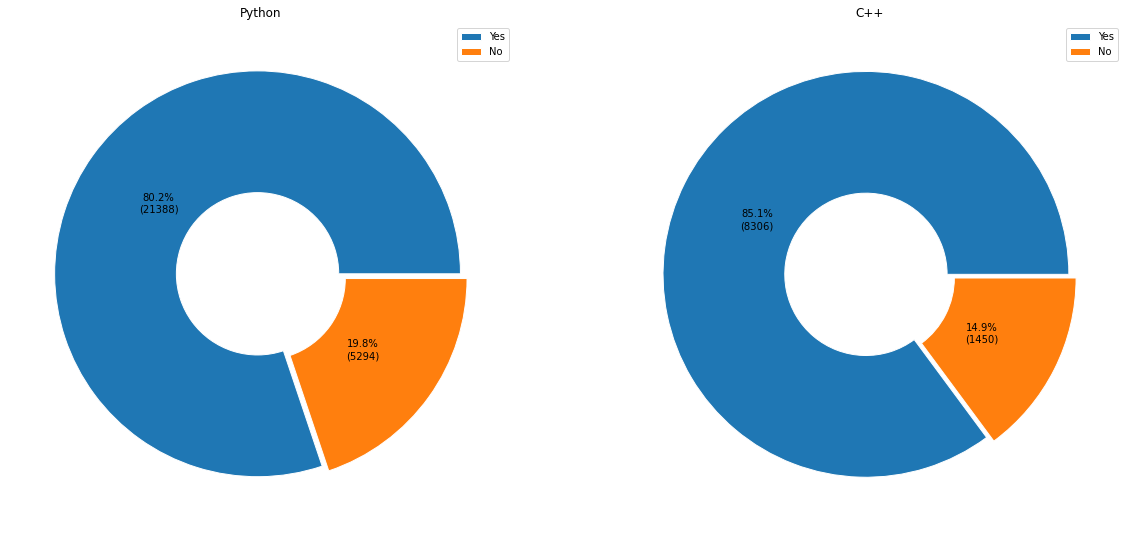

In [21]:
def pie_cnt(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


figure, axes = plt.subplots(1, 2, figsize = (20, 10))
index = 0
lang_ls = ['Python', 'C++']
for data in [python_user, cpp_user]:
    hobby_cnt = data.Hobbyist.value_counts()
    axes[index].pie(hobby_cnt, autopct=lambda pct: pie_cnt(pct, hobby_cnt), explode = [0.02] * len(hobby_cnt), wedgeprops=dict(width=0.6, edgecolor='w'))
    axes[index].legend(hobby_cnt.keys())
    axes[index].title.set_text(lang_ls[index])
    index += 1

准备在明年使用Python的人群中,80.2%是基于兴趣学习代码.而使用C++的人群中,这个比例达到了85%

明年将要使用Python的人群中,第一次写代码的年龄分布相差不大,均集中于11-20岁

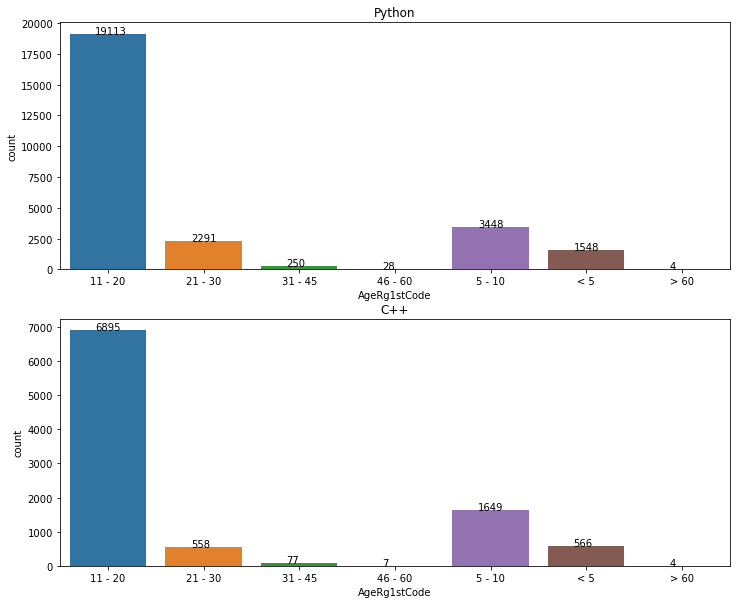

In [22]:
figure, axes = plt.subplots(2, 1, figsize = (12, 10))
index = 0
lang_ls = ['Python', 'C++']
for data in [python_user, cpp_user]:
    sns.countplot(ax = axes[index], x='AgeRg1stCode', data=data, order=sorted(data['AgeRg1stCode'].value_counts().keys().tolist()))
    for p in axes[index].patches:
        axes[index].text(s = p.get_height(), x = p.get_x() + p.get_width()/3, y = p.get_height())
    axes[index].title.set_text(lang_ls[index])
    index += 1
plt.show()

明年将要使用Python的人群现年龄分布

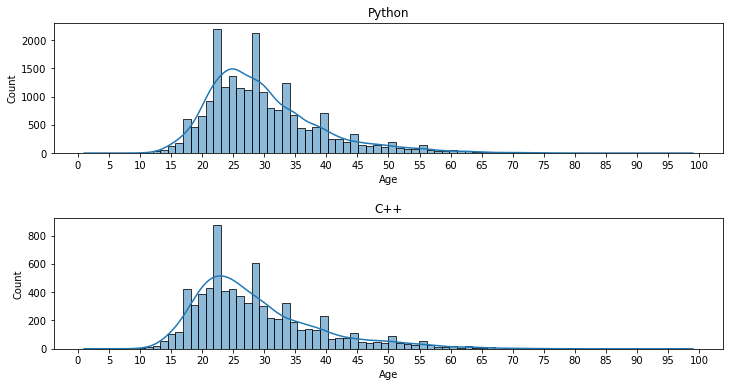

In [30]:
figure, axes = plt.subplots(2, 1, figsize = (12, 6))
index = 0
lang_ls = ['Python', 'C++']
plt.subplots_adjust(wspace = 0, hspace = 0.5)
for data in [python_user, cpp_user]:
    sns.histplot(ax = axes[index], data=data, x="Age",kde = True, bins = 80)
    x_major_locator=plt.MultipleLocator(5)
    axes[index].xaxis.set_major_locator(x_major_locator)
    axes[index].title.set_text(lang_ls[index])
    index += 1
plt.show()